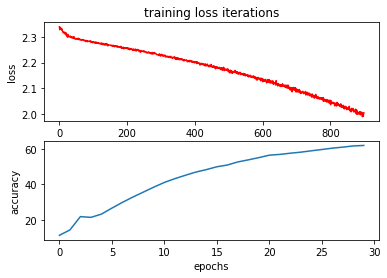

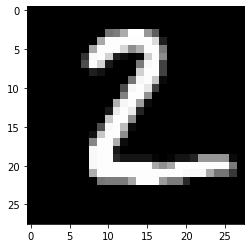

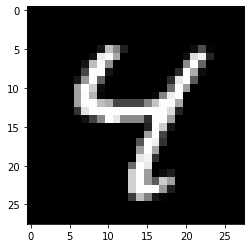

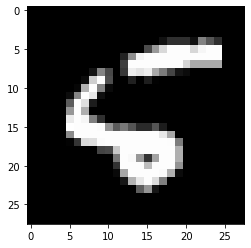

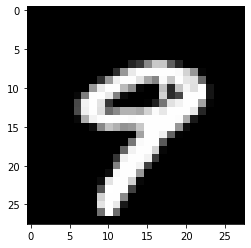

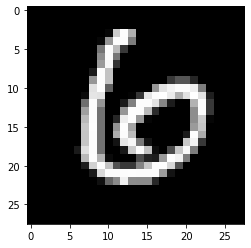

Accuracy:  0.06999999999999999


In [8]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import numpy as np


# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()


# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())



def show_data(data):
  plt.imshow(data.numpy().reshape(28,28), cmap='gray')
  plt.show()


class Net(nn.Module):
  def __init__(self,in_,neurons,out_):
    super(Net,self).__init__()
    self.linear1 = nn.Linear(in_,neurons)
    self.linear2 = nn.Linear(neurons,out_)

  def forward(self,x):
    x = self.linear1(x)
    x = torch.sigmoid(x)
    x = self.linear2(x)
    return x


train_data = dsets.MNIST(root="./data",train=True,transform=transforms.ToTensor(), download=True)
valid_data = dsets.MNIST(root="./data",train=False,transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(dataset=train_data,batch_size=2000,shuffle=True)
valid_loader = DataLoader(dataset=valid_data,batch_size=5000,shuffle=False)

in_ = 28*28
out_=10
neurons = 100

def train(train,valid,ValidData,model,criterion,optimiser,epochs):
  useful_stuff = {'training_loss': [],'validation_accuracy': []} 
  for epoch in range(epochs):
    for x,y in train:
      yhat = model(x.view(-1,in_))
      loss = criterion(yhat,y)
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()
      useful_stuff['training_loss'].append(loss.item())
    correct=0
    for x,y in valid:
      z = model(x.view(-1,in_))
      _,yhat = z.max(1)
      correct += (yhat == y).sum().item()
    accuracy = 100 * (correct/len(ValidData))
    useful_stuff['validation_accuracy'].append(accuracy)
  
  return useful_stuff

model = Net(in_,neurons,out_)
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(),lr=0.01)
epochs = 30

training_results = train(train_loader,valid_loader,valid_data,model,criterion,optimiser,epochs)

plot_accuracy_loss(training_results)



count = 0
right=0
for x, y in valid_data:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)
    if(yhat==y):
      right +=1
    if yhat != y:
        show_data(x)
        count += 1
    if count >= 5:
        break

acc = 100 * (right/len(valid_data))
print('Accuracy: ',acc)
